In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_wom = pd.read_excel("komtopp50_2020.xlsx", sheet_name="Kvinnor", header=6, usecols="A:F")

df_wom.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]

dropped_wom = df_wom.drop(["Rang 2020", "Rang 2019"], axis=1)

dropped_wom['Kön'] = 'Kvinna'



df_men = pd.read_excel("komtopp50_2020.xlsx", sheet_name="Män", header=6, usecols="A:F")

df_men.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]

dropped_men = df_men.drop(["Rang 2020", "Rang 2019"], axis=1)

dropped_men['Kön'] = 'Man'


#print(df_wom.head())
#print(df_men.head())
#print(df_men.info())

merged_df = pd.concat([dropped_men, dropped_wom], axis=0)
print(merged_df)


           Kommun  Folkmängd 2020  Folkmängd 2019 Förändring     Kön
0             Ale           16256           16054   1.258253     Man
1        Alingsås           20702           20646   0.271239     Man
2         Alvesta           10367           10339   0.270819     Man
3           Aneby            3503            3498   0.142939     Man
4          Arboga            7094            7114  -0.281136     Man
..            ...             ...             ...        ...     ...
285     Österåker           22997           22442   2.473042  Kvinna
286     Östhammar           10846           10803   0.398038  Kvinna
287  Östra Göinge            7270            7262   0.110162  Kvinna
288     Överkalix            1559            1578  -1.204056  Kvinna
289    Övertorneå            2027            2065  -1.840194  Kvinna

[580 rows x 5 columns]


In [4]:

df = pd.read_excel("komtopp50_2020.xlsx", sheet_name="Totalt", header=6, usecols="A:F")

df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Total Pop 2020", "Total Pop 2019", "Total förändring"]

# Ett annat alterntiv (Ett sämre alternativ)
'''df = df.rename(columns={
    "Folkmängd 2020": "Total Pop 2020",
    "Folkmängd 2019": "Total Pop 2019",
    "Förändring": "Total förändring"
})'''

dropped_df = df.drop(["Rang 2020", "Rang 2019"], axis=1) 

print(dropped_df)

           Kommun  Total Pop 2020  Total Pop 2019  Total förändring
0             Ale           31868           31402          1.483982
1        Alingsås           41602           41420          0.439401
2         Alvesta           20224           20134          0.447005
3           Aneby            6821            6848         -0.394276
4          Arboga           14039           14087         -0.340740
..            ...             ...             ...               ...
285     Österåker           46644           45574          2.347830
286     Östhammar           22251           22250          0.004494
287  Östra Göinge           15017           15007          0.066636
288     Överkalix            3289            3315         -0.784314
289    Övertorneå            4217            4299         -1.907420

[290 rows x 4 columns]


In [5]:
combined_df = pd.concat([merged_df, dropped_df], axis=1)

combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

combined_df = combined_df.sort_values(by="Total Pop 2020", ascending=False)

print(combined_df.tail(20))

        Kommun  Folkmängd 2020  Folkmängd 2019 Förändring     Kön  \
157     Norsjö            1909            1918  -0.469239  Kvinna   
157     Norsjö            2036            2068  -1.547389     Man   
265       Ydre            1936            1934   0.103413     Man   
265       Ydre            1790            1813  -1.268616  Kvinna   
146   Munkfors            1880            1887  -0.370959     Man   
146   Munkfors            1845            1853  -0.431732  Kvinna   
288  Överkalix            1730            1737  -0.402994     Man   
288  Överkalix            1559            1578  -1.204056  Kvinna   
136       Malå            1555            1586  -1.954603     Man   
136       Malå            1469            1482  -0.877193  Kvinna   
271      Åsele            1469            1456   0.892857     Man   
271      Åsele            1336            1338  -0.149477  Kvinna   
5     Arjeplog            1426            1458  -2.194787     Man   
5     Arjeplog            1292    

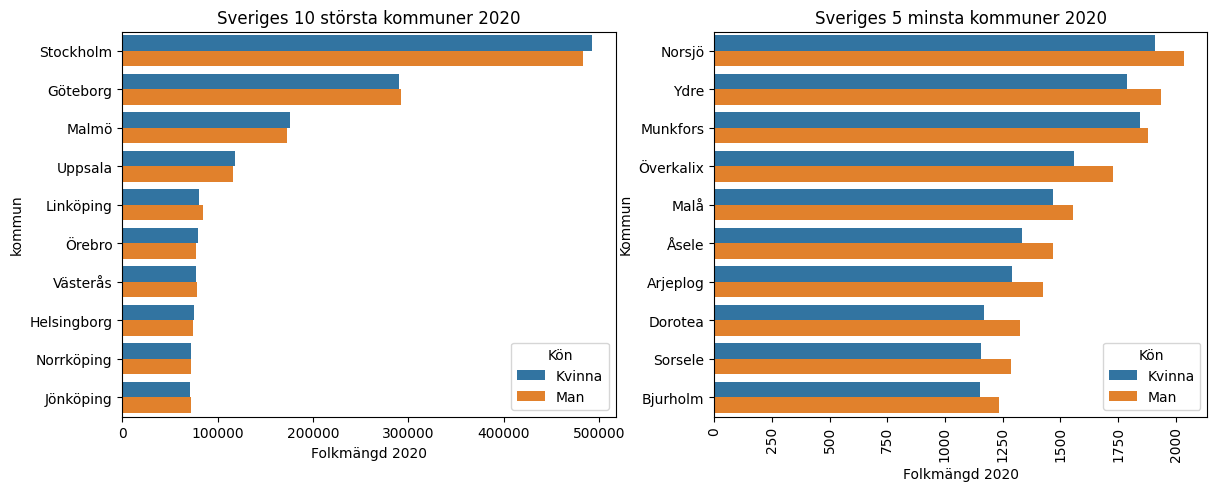

In [6]:
top10 = combined_df.sort_values(by="Total Pop 2020", ascending=False).head(20)
bottom10 = combined_df.sort_values(by="Total Pop 2020", ascending=False).tail(20)



fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=top10, y="Kommun", x="Folkmängd 2020", hue="Kön", ax=axes[0])
axes[0].set_title('Sveriges 10 största kommuner 2020')
axes[0].set_xlabel('Folkmängd 2020')
axes[0].set_ylabel('kommun')

sns.barplot(data=bottom10, y="Kommun", x="Folkmängd 2020", hue="Kön", ax=axes[1])
axes[1].set_title('Sveriges 5 minsta kommuner 2020')
axes[1].set_xlabel('Folkmängd 2020')
axes[1].set_ylabel('Kommun')


plt.xticks(rotation=90)
plt.show()



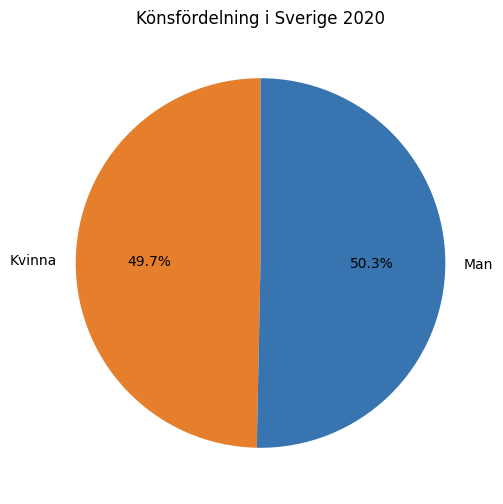

In [16]:
total_wom = dropped_wom["Folkmängd 2020"].sum()
total_man = dropped_men["Folkmängd 2020"].sum()

total_both = total_wom + total_man

percent_woman = total_wom / total_both * 100
percent_man = total_man / total_both * 100

# print(percent_woman.round(1))

import matplotlib.pyplot as plt

# Totals
totals = [total_wom, total_man]
labels = ['Kvinna', 'Man']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    totals, 
    labels=labels, 
    autopct='%1.1f%%',  # show percentages on slices
    startangle=90,       # rotate start to top
    colors=["#e67f2b","#3874af"]  
)

plt.title('Könsfördelning i Sverige 2020')
plt.show()
